# Project: Ford Gobike Analysis

### Investigation Overview
Here I Choose Ford GoBike data set Because to investigate bike hiring by different people.There are a lot of different variables and the main focus was on user type (customer or subscriber), Gender(Male or Female) and Age ,The analysis is based on the amount and duration of past rides.

### Dataset Overview
This dataset includes information about individual bicycle rides made in a bike-sharing system and, the dataset which will be explored from june 2017 to december 2018.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import Series, DataFrame
import requests
import os
import csv 
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load data
dff=pd.read_csv('fordgobike_explain.csv')

In [3]:
dff.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,Age,duration_mins,Gage
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,30,1335.166667,25-34
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,52,1313.333333,45-54
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0,NaN,0,762.800000,NaN


### Distribution of Gender (Male, Famale, Other)
The most rides are taken by male with 74%.

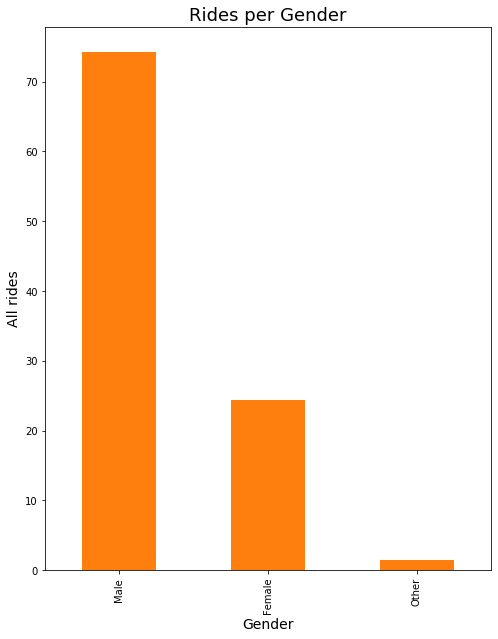

In [4]:
plt.figure(figsize=[8, 10])
(dff.member_gender.value_counts(sort=True, normalize=True)*100).plot.bar(color = sb.color_palette()[1]);
plt.title("Rides per Gender", fontsize=18)
plt.ylabel("All rides", fontsize=14)
plt.xlabel("Gender", fontsize=14);

### Distribution of Age
The most rides have been done by user from 30 to 40 years.

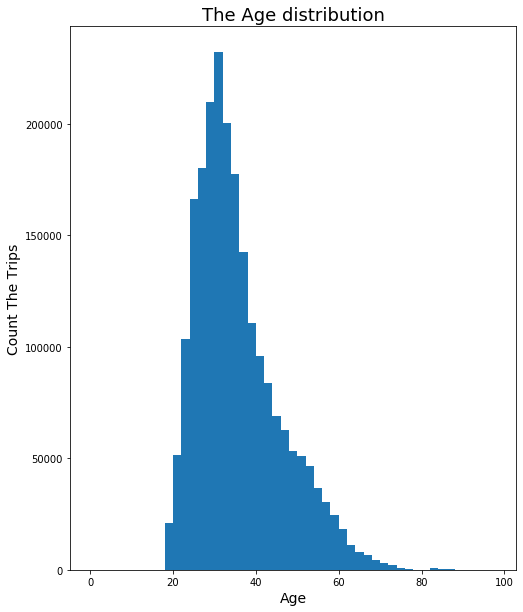

In [5]:
plt.figure(figsize=[8, 10])
df_age = dff.query('Age > 0')
bins = np.arange(0, df_age['Age'].max()+2, 2)
plt.hist(data = df_age, x = 'Age', bins = bins)
plt.title("The Age distribution", fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count The Trips', fontsize=14);

### Distribution of Rides per Gender and Age Group 
The most rides have been done by male from 25 to 34 years.

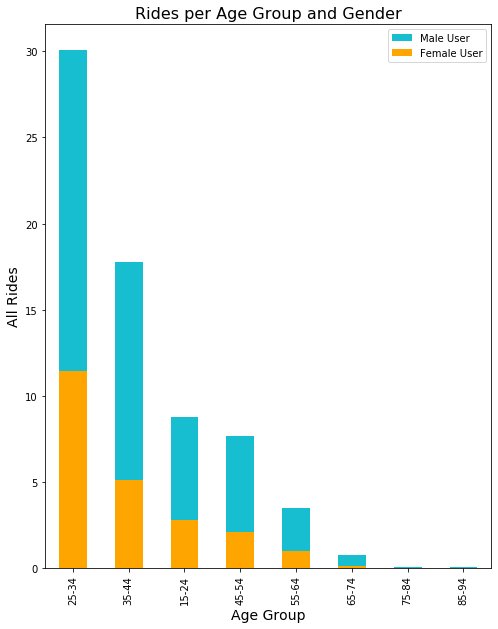

In [6]:
plt.figure(figsize=[8, 10])
df2_male = dff[(dff.member_gender == "Male")]
df2_female = dff[(dff.member_gender == "Female")]
x=len(dff)
q=len(dff)
(df2_male.Gage.value_counts() / x*100).plot.bar(color = sb.color_palette()[9], label='Male User');
(df2_female.Gage.value_counts() / q*100).plot.bar(color = 'orange', label='Female User');
plt.legend(loc='upper right')
plt.title("Rides per Age Group and Gender", fontsize=16)
plt.ylabel('All Rides', fontsize=14)
plt.xlabel('Age Group', fontsize=14);

### Distribution of User Type (Subscriber, Customer)
The most rides have been done by Subscriber with 84%

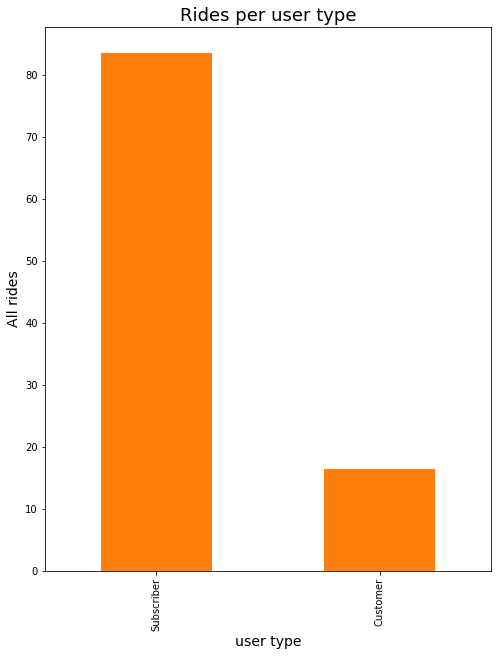

In [7]:
plt.figure(figsize=[8, 10])
(dff.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(color = sb.color_palette()[1])
plt.title("Rides per user type", fontsize=18)
plt.ylabel("All rides", fontsize=14)
plt.xlabel("user type", fontsize=14);

### Number and Duration of Rides per Gender and  Age Group 
The most user they are age group from 25 to 34 and they are male, and also that female users are generally younger than male users.


In [8]:
df2_subscriber = dff[(dff.user_type == "Subscriber")]
Sno_outliers = df2_subscriber[(df2_subscriber.duration_sec <= 14400)]
Skeep_male_female = Sno_outliers[(Sno_outliers.member_gender != "Other")]
Srides= Skeep_male_female.groupby(['member_gender', 'Gage']).size()
Srides = Srides.reset_index(name = 'count')
Srides = Srides.pivot(index = 'Gage', columns = 'member_gender', values = 'count')
Sduration = Skeep_male_female.groupby(['member_gender', 'Gage'])['duration_sec'].agg('sum')
Sduration = Sduration 
Sduration = Sduration.reset_index(name = 'duration_min')
Sduration = Sduration.pivot(index = 'Gage', columns = 'member_gender', values = 'duration_min')

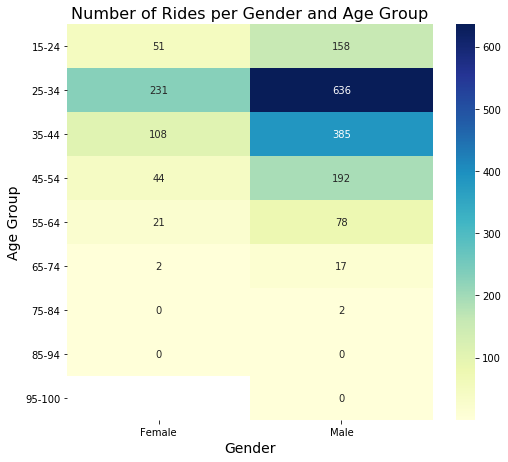

In [9]:
plt.figure(figsize = [18, 16])
plt.subplot(2, 2, 1)
sb.heatmap(Srides/1000, annot = True, fmt =  '.0f',  cmap = 'YlGnBu')
plt.title("Number of Rides per Gender and Age Group", fontsize=16)
plt.ylabel("Age Group", fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.yticks(rotation=360);

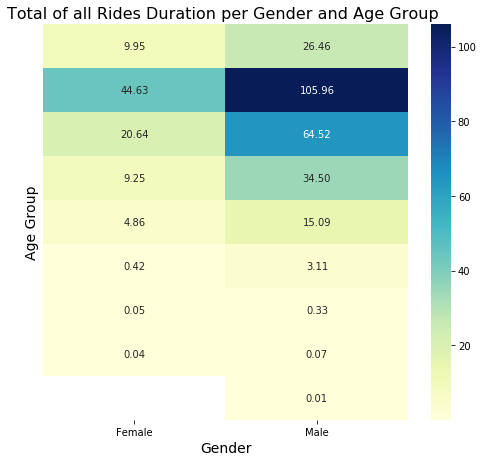

In [10]:
plt.figure(figsize = [18, 16])

plt.subplot(2, 2, 2)
sb.heatmap(Sduration/60/60/1000, annot = True, fmt =  '.2f',  cmap = 'YlGnBu', yticklabels=False)
plt.title("Total of all Rides Duration per Gender and Age Group ", fontsize=16)
plt.ylabel("Age Group", fontsize=14)
plt.xlabel("Gender", fontsize=14);

In [ ]:
!jupyter nbconvert "slide_deck_ template.ipynb" --to slides --post serve --template output_toggle